# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [111]:
# NUM_POINTS = 50   # DEBUG 1500
BASE_URL = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"



In [112]:
BASE_URL

'http://api.openweathermap.org/data/2.5/weather?appid=f4a34984882705ef6c4e28ef993c3fc1'

### Generate the Cities List by Using the `citipy` Library

In [113]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


In [114]:
cities

['yuzhno-kurilsk',
 'kamenka',
 'thompson',
 'puerto natales',
 'wailua homesteads',
 'okha',
 'salto',
 'rongelap',
 'bilibino',
 'tolanaro',
 'adamstown',
 'mokhotlong',
 'pemangkat',
 'talnakh',
 'vadso',
 'sao vicente',
 'merrill',
 'yashkino',
 'villa gesell',
 'hawaiian paradise park',
 "nar'yan-mar",
 'plastun',
 'bredasdorp',
 'la passe',
 'klaksvik',
 'port blair',
 'nova sintra',
 'newman',
 'ain taya',
 'port douglas',
 'lihue',
 'longyearbyen',
 'cargados carajos',
 'codrington',
 'benguela',
 'nadym',
 'bela',
 'bethel',
 'alice springs',
 'nakama',
 'acarau',
 'san carlos',
 'iqaluit',
 'udachny',
 'muscat',
 'yellowknife',
 'edinburgh of the seven seas',
 'albany',
 'port mathurin',
 'vorgashor',
 'port-aux-francais',
 'ouadda',
 'chegdomyn',
 'avarua',
 'carbonear',
 'rogers park',
 'novo aripuana',
 'kodiak',
 'la rinconada',
 'ilulissat',
 'soio',
 'minacu',
 'taksimo',
 'salekhard',
 'beruniy',
 'vingt cinq',
 'onega',
 'gueltat zemmour',
 'atafu village',
 'kolpashe

In [115]:
cities[0]

'yuzhno-kurilsk'

In [116]:


for city in cities:

    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
    response = requests.get(city_url)
    city_data = response.json()
    print(city_data)

{'coord': {'lon': 145.8556, 'lat': 44.0306}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.69, 'feels_like': 279.7, 'temp_min': 281.69, 'temp_max': 281.69, 'pressure': 1029, 'humidity': 81, 'sea_level': 1029, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 3.35, 'deg': 323, 'gust': 3.5}, 'clouds': {'all': 98}, 'dt': 1699122488, 'sys': {'type': 2, 'id': 2087968, 'country': 'RU', 'sunrise': 1699131431, 'sunset': 1699167784}, 'timezone': 36000, 'id': 2119447, 'name': 'Yuzhno-Kurilsk', 'cod': 200}
{'coord': {'lon': 42.7678, 'lat': 51.3223}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.07, 'feels_like': 275.29, 'temp_min': 279.07, 'temp_max': 279.07, 'pressure': 1021, 'humidity': 62, 'sea_level': 1021, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 134, 'gust': 13.05}, 'clouds': {'

In [117]:
city_data['coord']['lat']

-14.2336

In [118]:
type(response.json())

dict

In [119]:
response.json()

{'coord': {'lon': -169.5144, 'lat': -14.2336},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 299.75,
  'feels_like': 299.75,
  'temp_min': 299.75,
  'temp_max': 299.75,
  'pressure': 1012,
  'humidity': 80,
  'sea_level': 1012,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 10.21, 'deg': 110, 'gust': 11.17},
 'rain': {'1h': 0.25},
 'clouds': {'all': 91},
 'dt': 1699122670,
 'sys': {'country': 'AS', 'sunrise': 1699116119, 'sunset': 1699161673},
 'timezone': -39600,
 'id': 5881165,
 'name': 'Ta`ū',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [120]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        

    # Create endpoint URL with each city
    city_url =  f"{BASE_URL}&q={city.replace(' ', '+')}"
    response = requests.get(city_url)
    
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
        })

    # If an error is experienced, skip the city
    except KeyError:
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yuzhno-kurilsk
Processing Record 2 of Set 1 | kamenka
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | okha
Processing Record 7 of Set 1 | salto
Processing Record 8 of Set 1 | rongelap
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | mokhotlong
Processing Record 13 of Set 1 | pemangkat
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | sao vicente
Processing Record 17 of Set 1 | merrill
Processing Record 18 of Set 1 | yashkino
Processing Record 19 of Set 1 | villa gesell
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | nar'yan-mar
Processing Record 22 of Set 1 | plastun
Processing R

In [121]:
len(city_data)

604

In [122]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yuzhno-kurilsk,44.0306,145.8556,281.69,81,98,3.35,RU,1699122488
1,kamenka,51.3223,42.7678,279.07,62,82,5.81,RU,1699122488
2,thompson,55.7435,-97.8558,264.24,73,100,2.57,CA,1699122488
3,puerto natales,-51.7236,-72.4875,284.40,50,40,10.80,CL,1699122465
4,wailua homesteads,22.0669,-159.3780,299.59,81,20,5.66,US,1699122489


In [123]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yuzhno-kurilsk,44.0306,145.8556,281.69,81,98,3.35,RU,1699122488
1,kamenka,51.3223,42.7678,279.07,62,82,5.81,RU,1699122488
2,thompson,55.7435,-97.8558,264.24,73,100,2.57,CA,1699122488
3,puerto natales,-51.7236,-72.4875,284.40,50,40,10.80,CL,1699122465
4,wailua homesteads,22.0669,-159.3780,299.59,81,20,5.66,US,1699122489


In [124]:
# Output File (CSV)
output_data = "output_data/cities.csv"

In [125]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data", index_label="City_ID")

In [126]:
# Read saved data
city_data_df = pd.read_csv("output_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yuzhno-kurilsk,44.0306,145.8556,281.69,81,98,3.35,RU,1699122488
1,kamenka,51.3223,42.7678,279.07,62,82,5.81,RU,1699122488
2,thompson,55.7435,-97.8558,264.24,73,100,2.57,CA,1699122488
3,puerto natales,-51.7236,-72.4875,284.40,50,40,10.80,CL,1699122465
4,wailua homesteads,22.0669,-159.3780,299.59,81,20,5.66,US,1699122489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

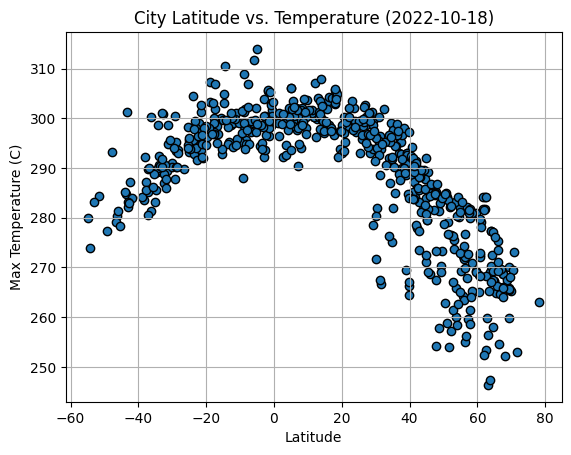

In [128]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', linewidths=1, marker='o',  label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

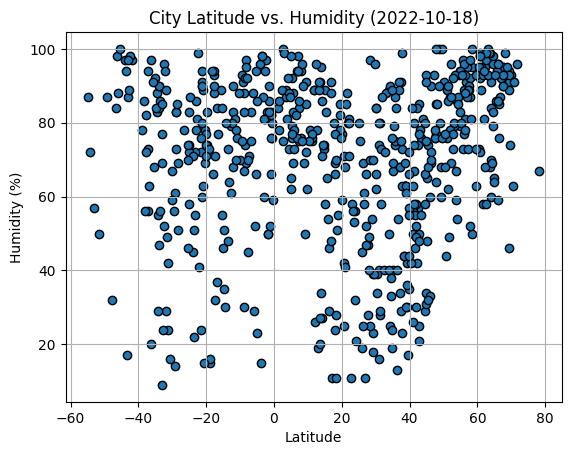

In [129]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', linewidths=1, marker='o',  label='Cities')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

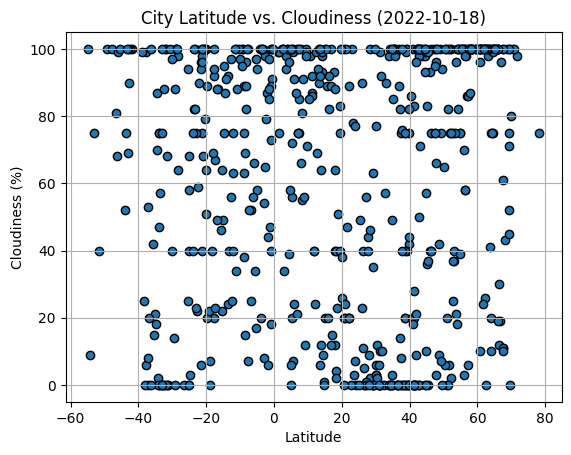

In [130]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', linewidths=1, marker='o',  label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

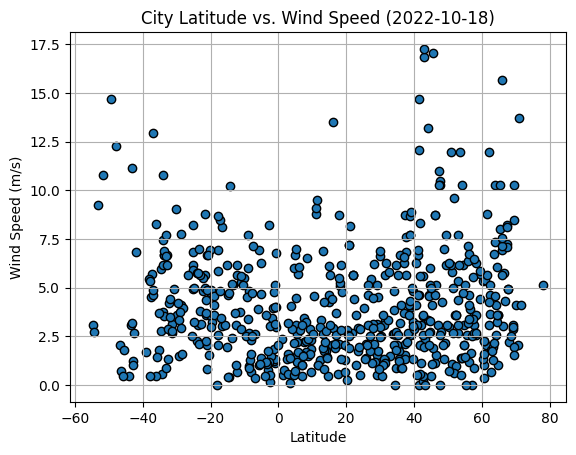

In [131]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', linewidths=1, marker='o',  label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# def linear_regression_plot(x_values, y_values):
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)

In [132]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yuzhno-kurilsk,44.0306,145.8556,281.69,81,98,3.35,RU,1699122488
1,kamenka,51.3223,42.7678,279.07,62,82,5.81,RU,1699122488
2,thompson,55.7435,-97.8558,264.24,73,100,2.57,CA,1699122488
4,wailua homesteads,22.0669,-159.3780,299.59,81,20,5.66,US,1699122489
5,okha,53.5739,142.9478,265.91,67,96,11.97,RU,1699122489


In [133]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,284.40,50,40,10.80,CL,1699122465
6,salto,-31.3833,-57.9667,294.75,42,0,3.13,UY,1699122191
9,tolanaro,-25.0319,46.9987,293.19,83,40,6.17,MG,1699122490
10,adamstown,-25.0660,-130.1015,295.67,74,68,6.83,PN,1699122490
11,mokhotlong,-29.2894,29.0675,287.84,61,88,1.48,LS,1699122490


###  Temperature vs. Latitude Linear Regression Plot

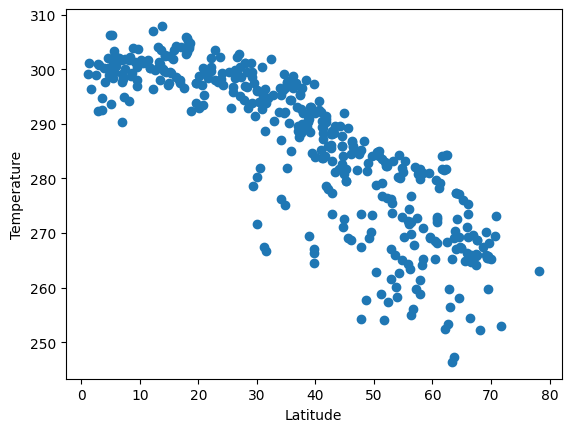

In [134]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [171]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      4.150886
1      4.408629
2      4.564907
4      3.374525
5      4.488217
         ...   
594    3.999486
598    4.312403
599    3.439550
600    4.050351
601    4.651141
Name: Lat, Length: 409, dtype: float64


/var/folders/x4/l7tc61hd00n1s8vbqfwjq7k40000gn/T/ipykernel_64882/351952290.py:2: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


In [185]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.04x +2.59


The r-value is: 0.7007292251536562


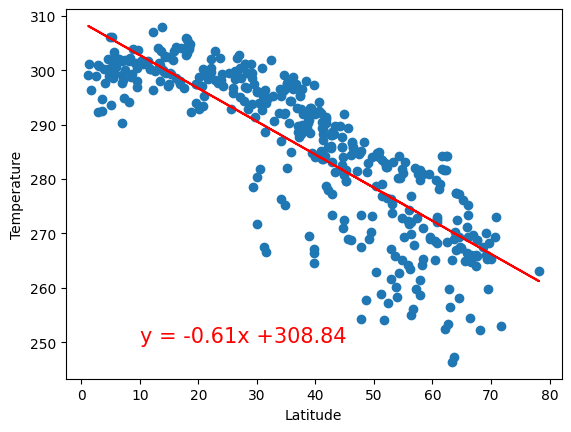

In [145]:
# Linear regression on Northern Hemisphere
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5484961196166955


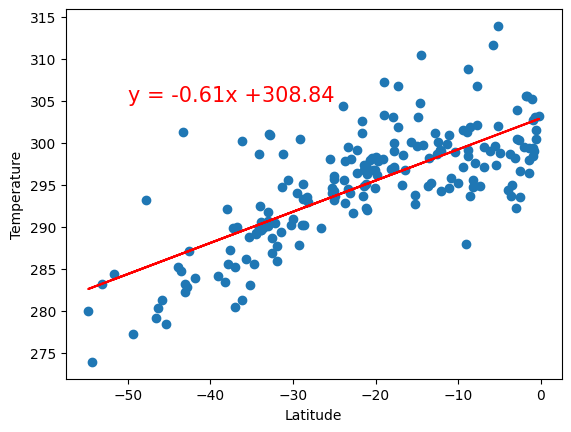

In [149]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Create Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

As could be predicted, the overall temperature increases as the latitude nears 0 (Equator)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015320297825345434


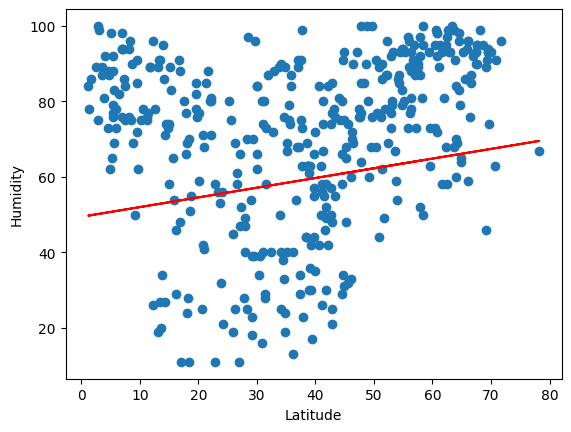

In [166]:

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,310),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5484961196166955


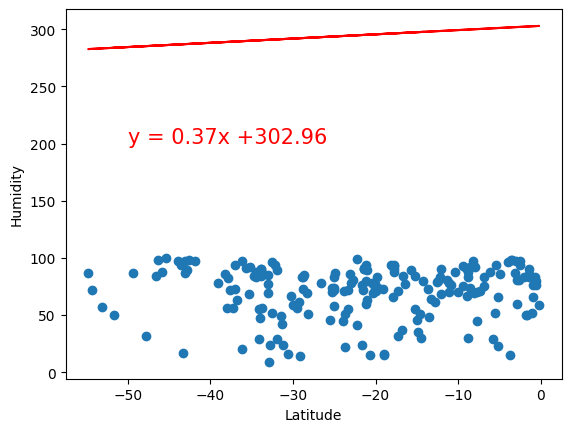

In [158]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,200),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The Humidity level increases the closer as the latitude nears "0"

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.015320297825345434


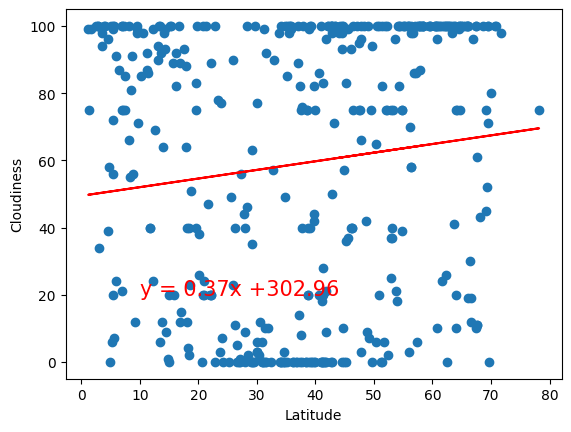

In [165]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.024026517125811015


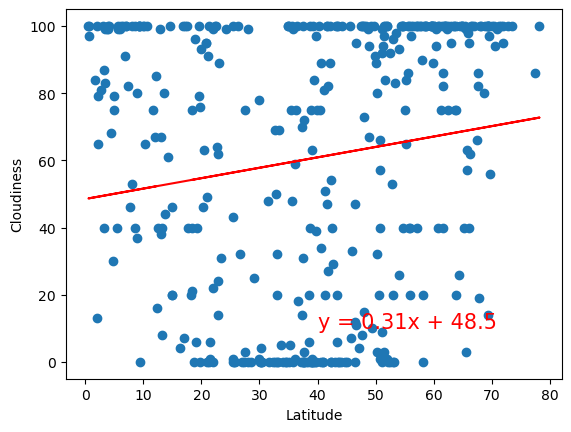

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

ValueError: x and y must have same first dimension, but have shapes (195,) and (409,)

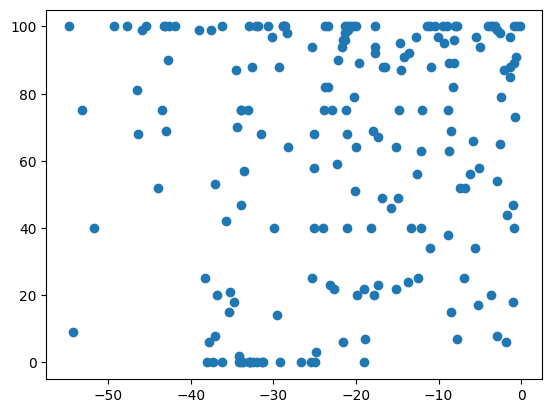

In [184]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.02056735429994368


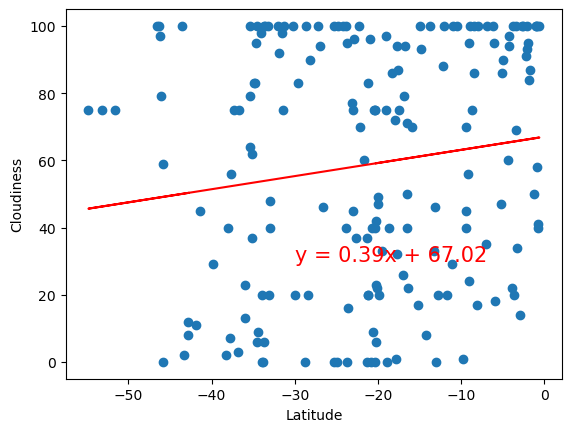

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

Cloudiness seems to be unrelated to the Latitude. Further research required

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05311042854370688


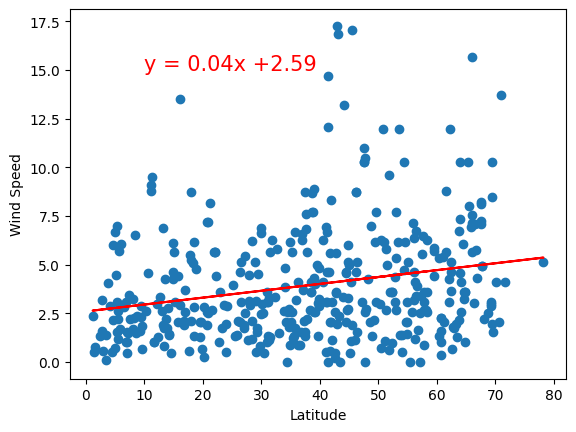

In [186]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [187]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.04x +2.59


ValueError: x and y must have same first dimension, but have shapes (195,) and (409,)

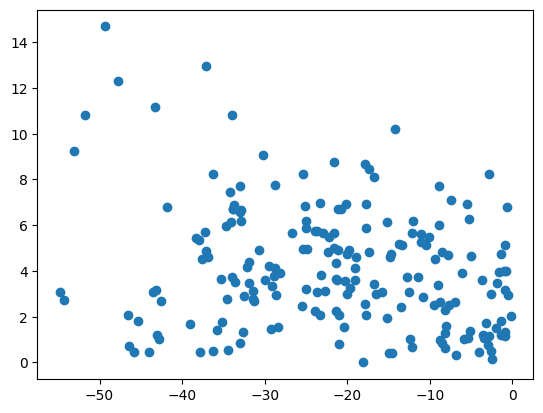

In [188]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The Wind Speed appears to increase the further away from center.